# Adaptive Exponential Integrate-and-Fire model

Adaptive Exponential Integrate-and-Fire neuron model is a spiking model, describes single neuron behavior and can generate many kinds of firing patterns by tuning parameters.

In [1]:
import brainpy as bp
import numpy as np
from bpmodels.neurons import get_AdExIF
import matplotlib.pyplot as plt

bp.profile.set(jit=True, device='cpu', dt=.1, merge_steps=True)

In [2]:
def run_neuron(neu_type, I_ext=10., duration=100., ylim=False, title=''):
    neuron = bp.NeuGroup(neu_type, 1, monitors=['V'])

    neuron.run(duration=duration, inputs=["ST.input", I_ext])

    fig, gs = bp.visualize.get_figure(1, 1, 3, 5)

    fig.add_subplot(gs[0, 0])
    plt.plot(neuron.mon.ts, neuron.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlabel('Time (ms)')
    plt.xlim(-0.1, duration + 0.1)
    if ylim:
        plt.ylim(-95., 40.)
    plt.title(neu_type.name+title)
    plt.legend()

    plt.show()

tonic


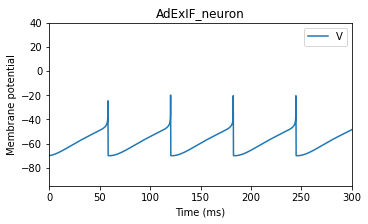

adapting


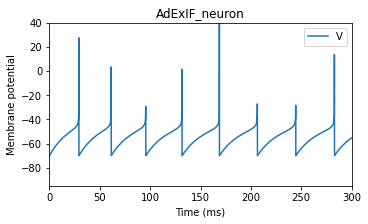

init_bursting


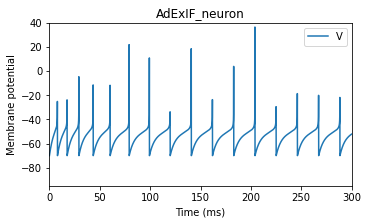

bursting


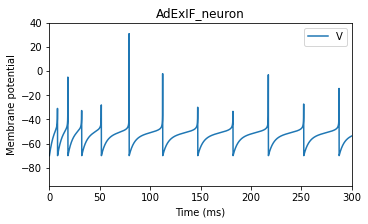

irregular


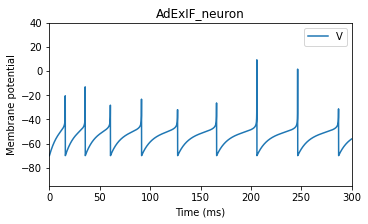

transient


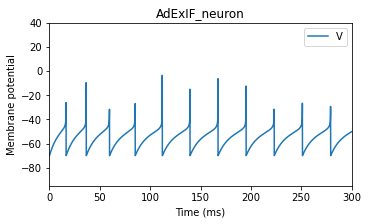

delayed


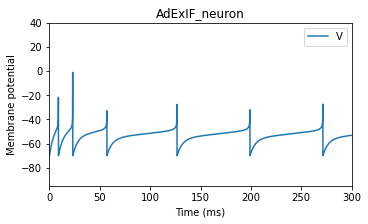

In [3]:
patterns = dict(tonic = [20, 0.0, 30.0, 60, -55],
                adapting = [20, 0., 100, 5, -55],
                init_bursting = [5., .5, 100, 7, -51],
                bursting = [5., -.5, 100, 7, -46],
                irregular = [9.9, -.5, 100, 7, -46],
                transient = [10, 1., 100, 10, -60],
                delayed = [5, -1, 100, 10, -60])

for i in patterns:
    print(i)
    i = patterns[i]
    neu = get_AdExIF(tau=i[0],t_refractory=0,
                    a=-i[1],
                    tau_w=i[2],
                    b=i[3],
                    V_reset=-70,
                    V_rest=-70,
                    R=.5,
                    delta_T=2.,
                    V_th=-i[4],
                    V_T=-50)
    run_neuron(neu, I_ext=65, duration=300., ylim=True)

### Dynamics analysis

We can use phase plane analysis to predict the neuron behavior.

First, let's fix a and see the influence of parameter `b`.

SymPy solve "int_w(V, w) = 0" to "w = f(V, )", success.
SymPy solve "int_V(V, w) = 0" to "w = f(V, )", success.
SymPy solve derivative of "int_V(V, w)" by "V", success.
SymPy solve derivative of "int_V(V, w)" by "w", success.
SymPy solve derivative of "int_w(V, w)" by "V", success.
SymPy solve derivative of "int_w(V, w)" by "w", success.


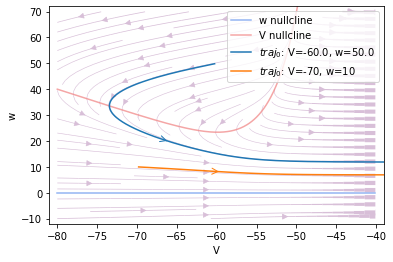

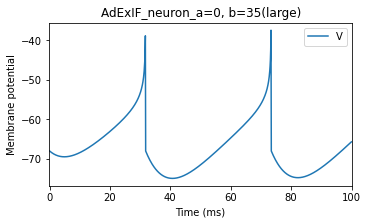

In [4]:
a=0
b=35
I_ext=25.
AdEx = get_AdExIF(a=a, b=b)

# phase plane analysis
analyzer = bp.analysis.PhasePlane(
    model=AdEx,
    target_vars={'V': [-80, -40], 'w': [-10., 70]},
    fixed_vars={'I_ext': I_ext})
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory([{'V': -60., 'w': 50.}],
                         duration=43.15,
                         inputs=('ST.input', I_ext))
analyzer.plot_trajectory([{'V': -70, 'w': 10}],
                         duration=11.2,
                         inputs=('ST.input', I_ext),
                         show=True)


run_neuron(AdEx, I_ext=I_ext, duration=100., title='_a='+str(a)+', b='+str(b)+'(large)')

SymPy solve "int_w(V, w) = 0" to "w = f(V, )", success.
SymPy solve "int_V(V, w) = 0" to "w = f(V, )", success.
SymPy solve derivative of "int_V(V, w)" by "V", success.
SymPy solve derivative of "int_V(V, w)" by "w", success.
SymPy solve derivative of "int_w(V, w)" by "V", success.
SymPy solve derivative of "int_w(V, w)" by "w", success.


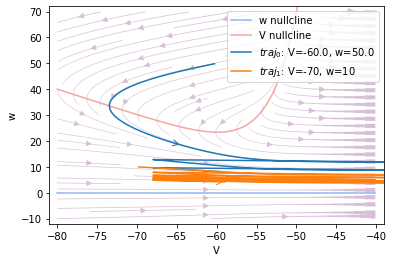

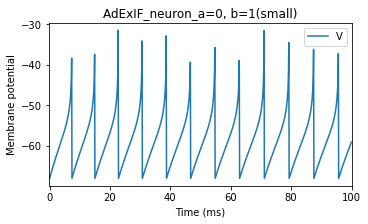

In [5]:
# a=0, small b
a=0
b=1
I_ext=25.
AdEx = get_AdExIF(a=a, b=b)

# phase plane analysis
analyzer = bp.analysis.PhasePlane(
    model=AdEx,
    target_vars={'V': [-80, -40], 'w': [-10., 70]},
    fixed_vars={'I_ext': I_ext})
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory([{'V': -60., 'w': 50.},{'V': -70, 'w': 10}],
                         duration=60.,
                         inputs=('ST.input', I_ext),
                         show=True)

run_neuron(AdEx, I_ext=I_ext, duration=100., title='_a='+str(a)+', b='+str(b)+'(small)')

SymPy solve "int_w(V, w) = 0" to "w = f(V, )", success.
SymPy solve "int_V(V, w) = 0" to "w = f(V, )", success.
SymPy solve derivative of "int_V(V, w)" by "V", success.
SymPy solve derivative of "int_V(V, w)" by "w", success.
SymPy solve derivative of "int_w(V, w)" by "V", success.
SymPy solve derivative of "int_w(V, w)" by "w", success.


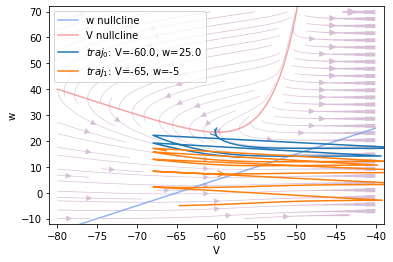

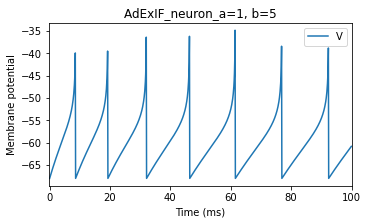

In [6]:
# a>0, medium b
a=1
b=5
I_ext=25.
AdEx = get_AdExIF(a=a, b=b)

# phase plane analysis
analyzer = bp.analysis.PhasePlane(
    model=AdEx,
    target_vars={'V': [-80, -40], 'w': [-10., 70]},
    fixed_vars={'I_ext': I_ext})
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory([{'V': -60., 'w': 25.},{'V': -65, 'w': -5}],
                         duration=50.,
                         inputs=('ST.input', I_ext),
                         show=True)

run_neuron(AdEx, I_ext=I_ext, duration=100., title='_a='+str(a)+', b='+str(b))

# Adaptive Quadratic Integrate-and-Fire model

Adaptive Quadratic Integrate-and-Fire neuron model is a spiking model, describes single neuron behavior and can generate many kinds of firing patterns by tuning parameters.

In [7]:
import brainpy as bp
import numpy as np
from bpmodels.neurons import get_AdQuaIF
import matplotlib.pyplot as plt

bp.profile.set(jit=True, device='cpu', dt=.1, merge_steps=True)

In [8]:
def run_neuron(neu_type, I_ext=10., duration=100., ylim=False, title=''):
    neuron = bp.NeuGroup(neu_type, 1, monitors=['V'])

    neuron.run(duration=duration, inputs=["ST.input", I_ext])

    fig, gs = bp.visualize.get_figure(1, 1, 3, 5)

    fig.add_subplot(gs[0, 0])
    plt.plot(neuron.mon.ts, neuron.mon.V[:, 0], label='V')
    plt.ylabel('Membrane potential')
    plt.xlabel('Time (ms)')
    plt.xlim(-0.1, duration + 0.1)
    if ylim:
        plt.ylim(-95., 40.)
    plt.title(neu_type.name+title)
    plt.legend()

    plt.show()

### Dynamics analysis

We can use phase plane analysis to predict the neuron behavior.

First, let's fix a and see the influence of parameter `b`.

SymPy solve "int_w(V, w) = 0" to "w = f(V, )", success.
SymPy solve "int_V(V, w) = 0" to "w = f(V, )", success.
SymPy solve derivative of "int_V(V, w)" by "V", success.
SymPy solve derivative of "int_V(V, w)" by "w", success.
SymPy solve derivative of "int_w(V, w)" by "V", success.
SymPy solve derivative of "int_w(V, w)" by "w", success.


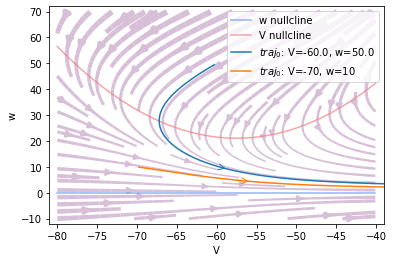

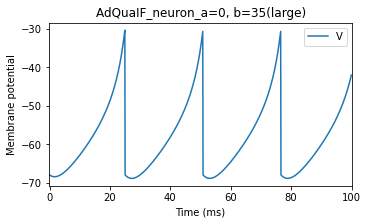

In [9]:
a=0
b=35
I_ext=25.
AdQua = get_AdQuaIF(a=a, b=b)

# phase plane analysis
analyzer = bp.analysis.PhasePlane(
    model=AdQua,
    target_vars={'V': [-80, -40], 'w': [-10., 70]},
    fixed_vars={'I_ext': I_ext})
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory([{'V': -60., 'w': 50.}],
                         duration=27,
                         inputs=('ST.input', I_ext))
analyzer.plot_trajectory([{'V': -70, 'w': 10}],
                         duration=15,
                         inputs=('ST.input', I_ext),
                         show=True)


run_neuron(AdQua, I_ext=I_ext, duration=100., title='_a='+str(a)+', b='+str(b)+'(large)')

SymPy solve "int_w(V, w) = 0" to "w = f(V, )", success.
SymPy solve "int_V(V, w) = 0" to "w = f(V, )", success.
SymPy solve derivative of "int_V(V, w)" by "V", success.
SymPy solve derivative of "int_V(V, w)" by "w", success.
SymPy solve derivative of "int_w(V, w)" by "V", success.
SymPy solve derivative of "int_w(V, w)" by "w", success.


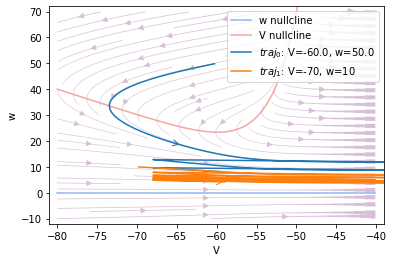

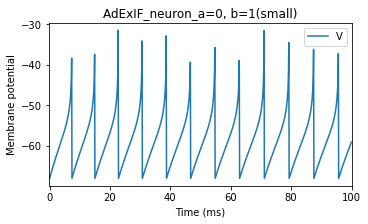

In [10]:
# a=0, small b
a=0
b=1
I_ext=25.
AdEx = get_AdExIF(a=a, b=b)

# phase plane analysis
analyzer = bp.analysis.PhasePlane(
    model=AdEx,
    target_vars={'V': [-80, -40], 'w': [-10., 70]},
    fixed_vars={'I_ext': I_ext})
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory([{'V': -60., 'w': 50.},{'V': -70, 'w': 10}],
                         duration=60.,
                         inputs=('ST.input', I_ext),
                         show=True)

run_neuron(AdEx, I_ext=I_ext, duration=100., title='_a='+str(a)+', b='+str(b)+'(small)')

SymPy solve "int_w(V, w) = 0" to "w = f(V, )", success.
SymPy solve "int_V(V, w) = 0" to "w = f(V, )", success.
SymPy solve derivative of "int_V(V, w)" by "V", success.
SymPy solve derivative of "int_V(V, w)" by "w", success.
SymPy solve derivative of "int_w(V, w)" by "V", success.
SymPy solve derivative of "int_w(V, w)" by "w", success.


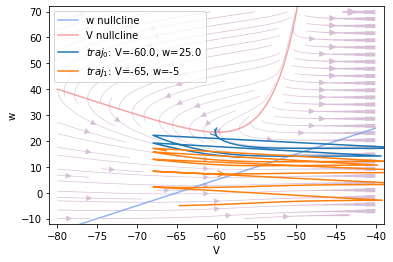

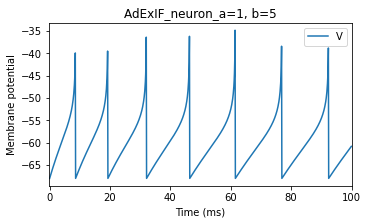

In [11]:
# a>0, medium b
a=1
b=5
I_ext=25.
AdEx = get_AdExIF(a=a, b=b)

# phase plane analysis
analyzer = bp.analysis.PhasePlane(
    model=AdEx,
    target_vars={'V': [-80, -40], 'w': [-10., 70]},
    fixed_vars={'I_ext': I_ext})
analyzer.plot_nullcline()
analyzer.plot_vector_field()
analyzer.plot_fixed_point()
analyzer.plot_trajectory([{'V': -60., 'w': 25.},{'V': -65, 'w': -5}],
                         duration=50.,
                         inputs=('ST.input', I_ext),
                         show=True)

run_neuron(AdEx, I_ext=I_ext, duration=100., title='_a='+str(a)+', b='+str(b))